In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
#Had to install this bc read_excel wasn't working for some reason
#pip install openpyxl --upgrade --pre

In [ ]:
data = pd.read_excel('Close_Prices.xlsx')

In [ ]:
data.head()

,Date,Gold,Platinum,Silver,Dow Jones,Euro,Yen,Renminbi
0,2022-02-01,1800.3,1021.8,22.60,35405.24,1.1230,0.008687,0.1572
1,2022-01-31,1795.0,1019.2,22.40,35131.86,1.1152,0.008676,0.1575
2,2022-01-28,1784.9,1004.9,22.30,34725.47,1.1147,0.008669,0.1571
3,2022-01-27,1793.3,1021.7,22.67,34160.78,1.1244,0.008717,0.1582
4,2022-01-26,1829.9,1046.1,23.81,34168.09,1.1305,0.008782,0.1581


In [ ]:
#Sort and Reset Index to be in chronological order
df = data.sort_values(by=['Date'])
df = df.reset_index(drop = True) 
df

,Date,Gold,Platinum,Silver,Dow Jones,Euro,Yen,Renminbi
0,2018-02-01,1344.3,1004.8,17.12,26186.71,1.2419,0.009157,0.1588
1,2018-02-02,1333.7,996.4,16.68,25520.96,1.2510,0.009140,0.1588
2,2018-02-05,1333.0,992.5,16.64,24345.75,1.2447,0.009088,0.1585
3,2018-02-06,1326.1,991.3,16.55,24912.77,1.2368,0.009166,0.1590
4,2018-02-07,1311.6,978.7,16.21,24893.35,1.2381,0.009122,0.1592
...,...,...,...,...,...,...,...,...
1170,2022-01-26,1829.9,1046.1,23.81,34168.09,1.1305,0.008782,0.1581
1171,2022-01-27,1793.3,1021.7,22.67,34160.78,1.1244,0.008717,0.1582
1172,2022-01-28,1784.9,1004.9,22.30,34725.47,1.1147,0.008669,0.1571
1173,2022-01-31,1795.0,1019.2,22.40,35131.86,1.1152,0.008676,0.1575


In [ ]:
#Checks to see how many null values there are
# df.isnull().values.any()
print('Gold Nan:', df['Gold'].isnull().sum())
print('Platinum Nan:',df['Platinum'].isnull().sum())
print('Silver Nan:',df['Silver'].isnull().sum())
print('Dow Jones Nan:',df['Dow Jones'].isnull().sum())
print('Euro Nan:',df['Euro'].isnull().sum())
print('Yen Nan:',df['Yen'].isnull().sum())
print('Renminbi Nan:',df['Renminbi'].isnull().sum())

Gold Nan: 166
Platinum Nan: 182
Silver Nan: 167
Dow Jones Nan: 167
Euro Nan: 132
Yen Nan: 132
Renminbi Nan: 133


In [ ]:
#Nan is about 14%, would still have about ~1000 values
167/df.shape[0]

0.14212765957446807

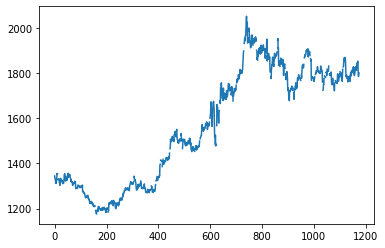

In [ ]:
#What Gold looks like before Nan clean
plt.plot(df['Gold'])

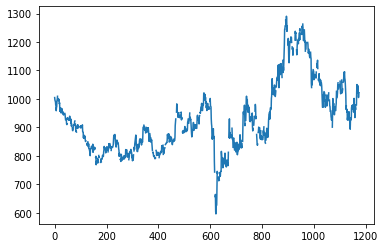

In [ ]:
#Plot of Platinum before clean
plt.plot(df['Platinum'])

In [ ]:
#Checks to see how many '-', to fill them with Nans
#Is 0, so don't have to fill them in
print('Number of - for Gold:', (df['Gold'] == '-').sum())
print('Number of - for Platinum:', (df['Platinum'] == '-').sum())
print('Number of - for Silver:', (df['Silver'] == '-').sum())
print('Number of - for Dow Jones:', (df['Dow Jones'] == '-').sum())
print('Number of - for Euro:', (df['Euro'] == '-').sum())
print('Number of - for Yen:', (df['Yen'] == '-').sum())
print('Number of - for Renminbi:', (df['Renminbi'] == '-').sum())

Number of - for Gold: 0
Number of - for Platinum: 0
Number of - for Silver: 0
Number of - for Dow Jones: 0
Number of - for Euro: 0
Number of - for Yen: 0
Number of - for Renminbi: 0


In order to fill in the Nans, we will use the same closing price as the day before.

In [ ]:
#Function to fill Nans with previous day's closing price
def fillNans(df, label):
  x=0
  for i in df[label].isnull():
    if i:
      temp = df[label][x-1]
      df[label][x] = temp
    x = x+1


In [ ]:
#Fill in all of the Nans
fillNans(df, 'Gold')
fillNans(df, 'Platinum')
fillNans(df, 'Silver')
fillNans(df, 'Dow Jones')
fillNans(df, 'Euro')
fillNans(df, 'Yen')
fillNans(df, 'Renminbi')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#Checks to see how many Null Values there are after fillNans function:
# df.isnull().values.any()
print('Gold Nan:', df['Gold'].isnull().sum())
print('Platinum Nan:',df['Platinum'].isnull().sum())
print('Silver Nan:',df['Silver'].isnull().sum())
print('Dow Jones Nan:',df['Dow Jones'].isnull().sum())
print('Euro Nan:',df['Euro'].isnull().sum())
print('Yen Nan:',df['Yen'].isnull().sum())
print('Renminbi Nan:',df['Renminbi'].isnull().sum())

Gold Nan: 0
Platinum Nan: 0
Silver Nan: 0
Dow Jones Nan: 0
Euro Nan: 0
Yen Nan: 0
Renminbi Nan: 0


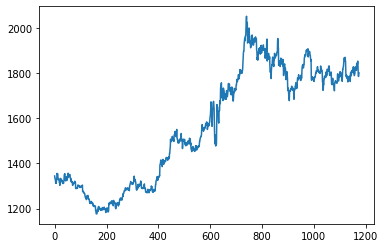

In [ ]:
#What Gold looks like after Nan cleanup (PREVIOUS CLOSING PRICE)
plt.plot(df['Gold'])

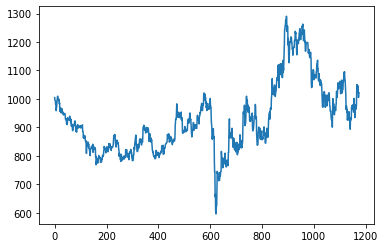

In [ ]:
#Plot of Platinum after clean
plt.plot(df['Platinum'])

In [ ]:
#Set index to start at 1
df.index = df.index + 1

In [ ]:
#Remove Dates
df = df.drop(['Date'], axis=1)
df

,Gold,Platinum,Silver,Dow Jones,Euro,Yen,Renminbi
1,1344.3,1004.8,17.12,26186.71,1.2419,0.009157,0.1588
2,1333.7,996.4,16.68,25520.96,1.2510,0.009140,0.1588
3,1333.0,992.5,16.64,24345.75,1.2447,0.009088,0.1585
4,1326.1,991.3,16.55,24912.77,1.2368,0.009166,0.1590
5,1311.6,978.7,16.21,24893.35,1.2381,0.009122,0.1592
...,...,...,...,...,...,...,...
1171,1829.9,1046.1,23.81,34168.09,1.1305,0.008782,0.1581
1172,1793.3,1021.7,22.67,34160.78,1.1244,0.008717,0.1582
1173,1784.9,1004.9,22.30,34725.47,1.1147,0.008669,0.1571
1174,1795.0,1019.2,22.40,35131.86,1.1152,0.008676,0.1575


In [ ]:
# # #Create V(t)
# # V = np.empty(shape = (7, 1175), dtype=object)
# # V = pd.DataFrame(V) #col will be t, rows will be j
# N = len(df)

# def V(t):
#   if t in range(1,1176):
#     return np.array(df.iloc[t-1])
#   else:
#     return print("index error")

In [ ]:
np.array(df.iloc[0,:])

array([1.3443000e+03, 1.0048000e+03, 1.7120000e+01, 2.6186710e+04,
       1.2419000e+00, 9.1574253e-03, 1.5880000e-01])

In [ ]:
#MICHAEL trying to make V
V = np.empty(shape = (df.shape[0],df.shape[1]))
for i in range(df.shape[0]):
  V[i] = np.array(df.iloc[i,:])


In [ ]:
V[1]

array([1.33370000e+03, 9.96400000e+02, 1.66800000e+01, 2.55209600e+04,
       1.25100000e+00, 9.14026653e-03, 1.58800000e-01])

In [ ]:
#V[0,1]
#V(1)

In [ ]:
# # #Create X(t)
# # Xtemp = np.empty(shape = (7, 1175), dtype=object)
# # labels = ['Gold', 'Platinum', 'Silver', 'Dow Jones', 'Euro', 'Yen', 'Renminbi']
# # k = 0 #to count label position in V
# # for j in labels: 
# #   for t in range(5,1176): #t goes from 5->1175 
# #     Xtemp[k,t-5] = df[j][t-5:t].tolist()
# #   k += 1 #j is 0->6 (theoretically 1->7)

# X1_Priors = pd.read_excel('X1_Prices.xlsx')
# X1_Priors = X1_Priors.sort_values(by=['Date'])
# X1_Priors = X1_Priors.reset_index(drop = True)
# X1_Priors = X1_Priors.drop(['Date'], axis=1)


# def x(t):
#   temp = np.array([])
#   if t == 1:
#     temp = np.append(temp, [df.iloc[0], X1_Priors.iloc[3], X1_Priors.iloc[2], X1_Priors.iloc[1], X1_Priors.iloc[0]])
#     return temp
#   elif t == 2:
#     temp = np.append(temp, [df.iloc[1], df.iloc[0], X1_Priors.iloc[3], X1_Priors.iloc[2], X1_Priors.iloc[1]])
#     return temp
#   elif t == 3:
#     temp = np.append(temp, [df.iloc[2], df.iloc[1], df.iloc[0], X1_Priors.iloc[3], X1_Priors.iloc[2]])
#     return temp
#   elif t == 4:
#     temp = np.append(temp, [df.iloc[3], df.iloc[2], df.iloc[1], df.iloc[0], X1_Priors.iloc[3]])
#     return temp
#   elif t in range(5,1176):
#     temp = np.append(temp, [df.iloc[t-1], df.iloc[t-2], df.iloc[t-3], df.iloc[t-4], df.iloc[t-5]])
#     return temp
#   else:
#     return print("index error")

In [ ]:
#X1_Priors

In [ ]:
#x(5)

In [ ]:
#xt = np.empty(shape=(1175,35))
#for i in range(1,1176):
#  xt[i-1] = x[i]
#
#xt

In [ ]:
#Create X(t)   
labels = ['Gold', 'Platinum', 'Silver', 'Dow Jones', 'Euro', 'Yen', 'Renminbi']
X = np.empty(shape = (1170,35))
for j in range(1170):
  x = np.array([])
  for k in range(j+5,j,-1):
    for i in labels:
      x = np.append(x, df[i][k])
  X[j] = x


In [ ]:
X[0]

array([1.31160000e+03, 9.78700000e+02, 1.62100000e+01, 2.48933500e+04,
       1.23810000e+00, 9.12184042e-03, 1.59200000e-01, 1.32610000e+03,
       9.91300000e+02, 1.65500000e+01, 2.49127700e+04, 1.23680000e+00,
       9.16632293e-03, 1.59000000e-01, 1.33300000e+03, 9.92500000e+02,
       1.66400000e+01, 2.43457500e+04, 1.24470000e+00, 9.08801745e-03,
       1.58500000e-01, 1.33370000e+03, 9.96400000e+02, 1.66800000e+01,
       2.55209600e+04, 1.25100000e+00, 9.14026653e-03, 1.58800000e-01,
       1.34430000e+03, 1.00480000e+03, 1.71200000e+01, 2.61867100e+04,
       1.24190000e+00, 9.15742530e-03, 1.58800000e-01])

#Q0


In [ ]:
labels = ['Gold', 'Platinum', 'Silver', 'Dow Jones', 'Euro', 'Yen', 'Renminbi']

In [ ]:
# #Compute Mj
# M = np.empty(7)
# for j in range(7):
#   M[j] =  df[labels[j]].mean()

# M

In [ ]:
#CHANGED M TO DEPEND ON V
#Compute Mj
M = np.empty(7)
for j in range(7):
  M[j] =  V[:,j].mean()

M

array([1.56759949e+03, 9.29178043e+02, 1.95115319e+01, 2.82623791e+04,
       1.15468996e+00, 9.17322484e-03, 1.49041277e-01])

In [ ]:
# #Graph Vj/Mj for j = 1

# plt.plot(df['Gold']/M[0], label = 'V1/M1')
# plt.plot(df['Renminbi']/M[6], label = 'V7/M7')
# plt.legend()
# plt.show()

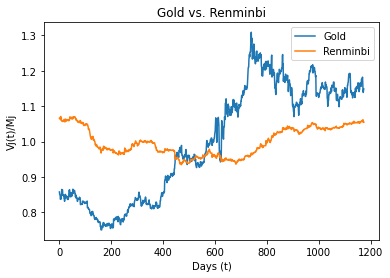

In [ ]:
#Also Changed to reflect V
#Graph Vj/Mj for j = 1

plt.plot(V[:,0]/M[0], label = 'Gold')
plt.plot(V[:,6]/M[6], label = 'Renminbi')
plt.legend()
plt.title('Gold vs. Renminbi')
plt.xlabel('Days (t)')
plt.ylabel('Vj(t)/Mj')
plt.show()

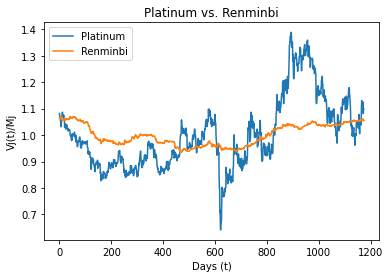

In [ ]:
#Graph Vj/Mj for j = 2

plt.plot(V[:,1]/M[1], label = 'Platinum')
plt.plot(V[:,6]/M[6], label = 'Renminbi')
plt.legend()
plt.title('Platinum vs. Renminbi')
plt.xlabel('Days (t)')
plt.ylabel('Vj(t)/Mj')
plt.show()

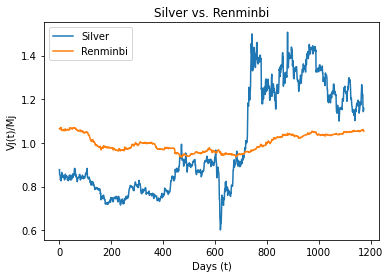

In [ ]:
#Graph Vj/Mj for j = 3

plt.plot(V[:,2]/M[2], label = 'Silver')
plt.plot(V[:,6]/M[6], label = 'Renminbi')
plt.legend()
plt.title('Silver vs. Renminbi')
plt.xlabel('Days (t)')
plt.ylabel('Vj(t)/Mj')
plt.show()

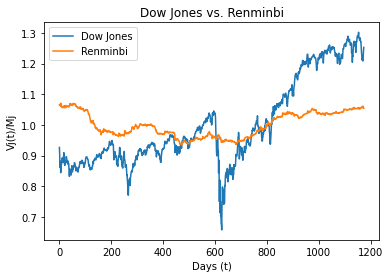

In [ ]:
#Graph Vj/Mj for j = 4

plt.plot(V[:,3]/M[3], label = 'Dow Jones')
plt.plot(V[:,6]/M[6], label = 'Renminbi')
plt.legend()
plt.title('Dow Jones vs. Renminbi')
plt.xlabel('Days (t)')
plt.ylabel('Vj(t)/Mj')
plt.show()

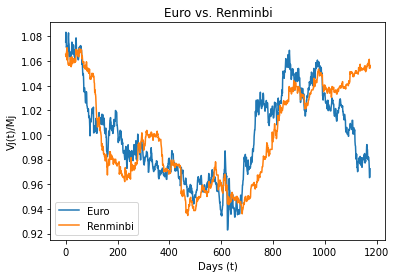

In [ ]:
#Graph Vj/Mj for j = 5

plt.plot(V[:,4]/M[4], label = 'Euro')
plt.plot(V[:,6]/M[6], label = 'Renminbi')
plt.legend()
plt.title('Euro vs. Renminbi')
plt.xlabel('Days (t)')
plt.ylabel('Vj(t)/Mj')
plt.show()

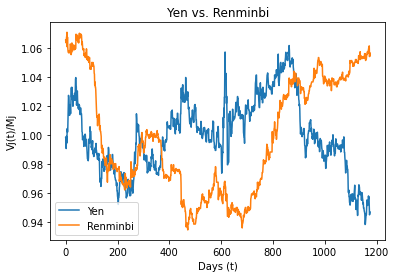

In [ ]:
#Graph Vj/Mj for j = 6

plt.plot(V[:,5]/M[5], label = 'Yen')
plt.plot(V[:,6]/M[6], label = 'Renminbi')
plt.legend()
plt.title('Yen vs. Renminbi')
plt.xlabel('Days (t)')
plt.ylabel('Vj(t)/Mj')
plt.show()

#Q1

In [ ]:
#USE THIS ONE SO FAR
#Michael
#Calculate rate of return
rV = np.empty(shape = (df.shape[0]-1,df.shape[1]))
for i in range(1,df.shape[0]):
  rV[i-1] = (V[i]-V[i-1]) / V[i-1]


In [ ]:
#New One
#Create rZ(t)
rZ = np.empty(1174)
for t in range(1174):
 rZ[t] = (V[t+1, 0] - V[t, 0])/V[t,0]
rZ

array([-0.00788514, -0.00052486, -0.00517629, ..., -0.0046841 ,
        0.00565858,  0.00295265])

In [ ]:
#UPDATED
#Michaels rX WITH rV
rX = np.empty(shape = (df.shape[0]-5,df.shape[1]*5))
for u in range(4,rX.shape[0]+4):
  rX[u-4] = np.concatenate((rV[u],rV[u-1],rV[u-2],rV[u-3],rV[u-4]))

In [ ]:
rX[1169]

array([ 0.00295265,  0.00255102,  0.00892857,  0.00778154,  0.00699426,
        0.0012248 , -0.00190476,  0.00565858,  0.01423027,  0.0044843 ,
        0.01170294,  0.00044855,  0.00078083,  0.00254615, -0.0046841 ,
       -0.01644318, -0.01632113,  0.01653036, -0.00862682, -0.00547021,
       -0.00695322, -0.02000109, -0.02332473, -0.04787904, -0.00021394,
       -0.00539584, -0.00737441,  0.00063251, -0.01230636,  0.0217816 ,
       -0.00376569, -0.00377984, -0.00167785,  0.00119429,  0.00063291])

In [ ]:
#Calculate the mean of rZ
mean_rZ =  (abs(rZ)).mean()
mean_rZ

0.005649980154734839

In [ ]:
# #Graph rV1 -> rV7
# plt.plot(rV[0], label = 'Gold')
# plt.plot(rV[1], label = 'Platinum')
# plt.plot(rV[2], label = 'Silver')
# plt.plot(rV[3], label = 'Dow Jones')
# plt.plot(rV[4], label = 'Euro')
# plt.plot(rV[5], label = 'Yen')
# plt.plot(rV[6], label = 'Renminbi')
# plt.legend()
# plt.show()

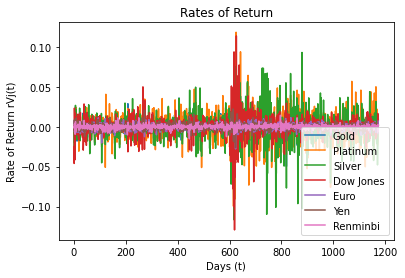

In [ ]:
#NEW ONE
#Graph rV1 -> rV7
plt.plot(rV[:,0], label = 'Gold')
plt.plot(rV[:,1], label = 'Platinum')
plt.plot(rV[:,2], label = 'Silver')
plt.plot(rV[:,3], label = 'Dow Jones')
plt.plot(rV[:,4], label = 'Euro')
plt.plot(rV[:,5], label = 'Yen')
plt.plot(rV[:,6], label = 'Renminbi')
plt.legend()
plt.ylabel('Rate of Return rVj(t)')
plt.xlabel('Days (t)')
plt.title('Rates of Return')
plt.show()

#Q2

In [ ]:
# Loading necessary packages for MLP

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
things = df.values
df.shape

(1175, 7)

In [ ]:
#Initializing MLP with h=3
h=3

model = Sequential()
model.add(Dense(h, input_shape=(35,), activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 108       
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# param(h) = (35*h + h) + (h*1 + 1) = 37*h + 1
def param(h):
  return 37*h + 1

param(3)

112

In [ ]:
model.get_weights()

[array([[ 0.0212788 , -0.12387204, -0.3041302 ],
        [-0.03389874, -0.20876461, -0.35510242],
        [ 0.03980508, -0.09718871, -0.11210737],
        [ 0.35948756,  0.07618967,  0.11578527],
        [ 0.02213627,  0.2861065 , -0.07034585],
        [-0.16793066,  0.19165364, -0.21532142],
        [-0.28396323, -0.21217233, -0.30531886],
        [-0.06292987, -0.12885705, -0.15337712],
        [-0.23373525,  0.09311971,  0.16060069],
        [-0.37343988,  0.28721085, -0.09153637],
        [-0.12039068,  0.22098479, -0.01672059],
        [ 0.10168734, -0.22375755, -0.0285995 ],
        [ 0.09323332, -0.3293484 ,  0.09336254],
        [-0.2642839 ,  0.303674  ,  0.10913166],
        [-0.03867438,  0.10147333,  0.16991559],
        [ 0.2980804 , -0.12593296, -0.11537102],
        [ 0.13547233, -0.15970097,  0.22753349],
        [-0.20272137, -0.37916026, -0.3369455 ],
        [-0.3657807 ,  0.24626407,  0.11918649],
        [-0.20398186,  0.24588332, -0.12561038],
        [-0.16297275

#Q3

In [ ]:
rZ

array([-0.00788514, -0.00052486, -0.00517629, ..., -0.0046841 ,
        0.00565858,  0.00295265])

In [ ]:
rV[:,0]

array([-0.00788514, -0.00052486, -0.00517629, ..., -0.0046841 ,
        0.00565858,  0.00295265])

In [ ]:
rX[:,0]

array([ 0.00404087, -0.00288556,  0.00845328, ..., -0.0046841 ,
        0.00565858,  0.00295265])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rX,rZ[4:], test_size=0.2)



In [ ]:
y_train

array([-5.73844760e-03, -1.42023039e-03,  2.36915787e-03,  1.14436116e-03,
        1.54164889e-02, -2.35811979e-04, -1.81353174e-02, -1.71941049e-02,
       -8.94785560e-03, -1.63223955e-02,  3.02957825e-03,  0.00000000e+00,
        0.00000000e+00,  1.88401048e-03, -8.16469353e-04,  5.18164546e-04,
        0.00000000e+00,  0.00000000e+00,  4.25123094e-02,  1.66704468e-02,
        5.57590335e-03,  1.24649074e-02,  1.69038064e-02, -8.56097751e-04,
       -1.46464351e-03, -3.34778970e-03, -1.17002278e-03,  0.00000000e+00,
       -1.02706134e-02,  5.32568619e-03,  2.23627883e-03, -1.90476190e-03,
        4.82509047e-03, -1.05467666e-03, -5.77271978e-04,  3.00975795e-02,
        0.00000000e+00,  4.15441646e-03,  0.00000000e+00,  4.68609578e-03,
       -1.06231765e-02,  0.00000000e+00, -1.27125134e-02,  6.81389049e-03,
        4.19841393e-03, -2.05939015e-03,  4.23212940e-03,  3.31674959e-03,
        4.52511956e-03,  7.79076238e-04, -1.32340778e-03, -1.85801657e-03,
       -1.80369758e-03, -

In [ ]:
TRN = X_train.shape[0] + y_train.shape[0]
TRN

1872

In [ ]:
#Length of training set
TRN

1872

In [ ]:
#35 features +2 , +1 
#37h +1 <881
#MAX h = 23


In [ ]:
#Sample h's
#4,10,15,22


#Q4

In [ ]:
# ##### Q4
# # Trying combinations of different h values and BATS
# import time

# h_vals = [23, 3*23]
# BATS = [TRN//40, TRN//20, TRN//10, TRN//2]
# numBATS = [40, 20, 10, 2]
# TOTEP = 150

# for i in h_vals:
#   for j in range(len(BATS)):
#     time1 = time.time()
#     model = Sequential()
#     model.add(Dense(i, input_shape=(35,), activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.summary()

#     model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#     history = model.fit(X_train, y_train, epochs= TOTEP, batch_size = BATS[j], verbose = 0, validation_split = 0.2)
#     time2 = time.time()
#     print("Hyperparameters: h = %d, BAT= %d" % (i, BATS[j]))
#     print("Computing Time: ", round(time2 - time1, 2), "sec")
#     print("Number of batches: ", numBATS[j])
#     print("Terminal value of MSE: ", history.history['mse'][-1])
#     plt.plot(history.history['mse'])
#     plt.title('MSE curve')
#     plt.ylabel('MSE')
#     plt.xlabel('Epoch')
#     plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 23)                828       
                                                                 
 dense_19 (Dense)            (None, 1)                 24        
                                                                 
Total params: 852
Trainable params: 852
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 23, BAT = 46
Computing Time:  10.78 sec
Number of batches:  40
Terminal value of MSE:  2.7570486338390765e-08


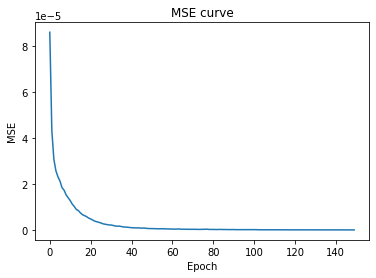

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 23)                828       
                                                                 
 dense_21 (Dense)            (None, 1)                 24        
                                                                 
Total params: 852
Trainable params: 852
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 23, BAT = 93
Computing Time:  10.72 sec
Number of batches:  20
Terminal value of MSE:  6.82275071994809e-08


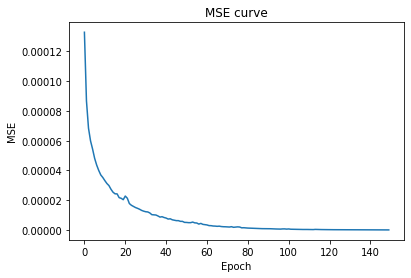

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 23)                828       
                                                                 
 dense_23 (Dense)            (None, 1)                 24        
                                                                 
Total params: 852
Trainable params: 852
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 23, BAT = 187
Computing Time:  5.51 sec
Number of batches:  10
Terminal value of MSE:  9.440284998163406e-07


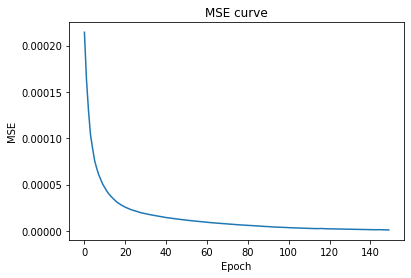

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 23)                828       
                                                                 
 dense_25 (Dense)            (None, 1)                 24        
                                                                 
Total params: 852
Trainable params: 852
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 23, BAT = 936
Computing Time:  3.85 sec
Number of batches:  2
Terminal value of MSE:  1.1088265637226868e-05


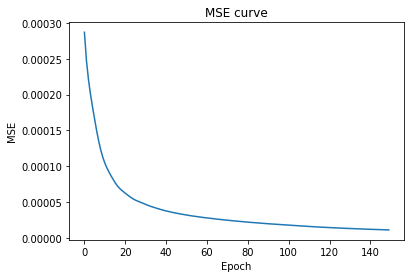

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 69)                2484      
                                                                 
 dense_27 (Dense)            (None, 1)                 70        
                                                                 
Total params: 2,554
Trainable params: 2,554
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 69, BAT = 46
Computing Time:  10.69 sec
Number of batches:  40
Terminal value of MSE:  7.530118040222078e-08


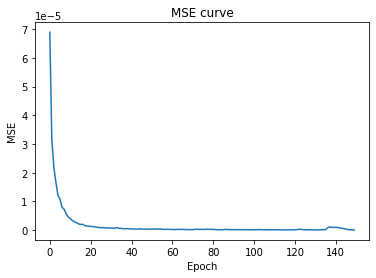

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 69)                2484      
                                                                 
 dense_29 (Dense)            (None, 1)                 70        
                                                                 
Total params: 2,554
Trainable params: 2,554
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 69, BAT = 93
Computing Time:  10.82 sec
Number of batches:  20
Terminal value of MSE:  2.148511129007602e-07


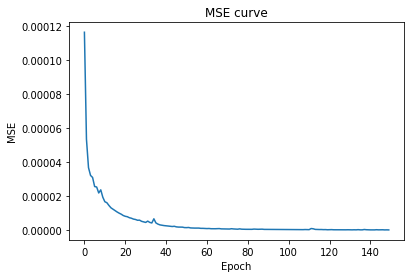

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 69)                2484      
                                                                 
 dense_31 (Dense)            (None, 1)                 70        
                                                                 
Total params: 2,554
Trainable params: 2,554
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 69, BAT = 187
Computing Time:  5.17 sec
Number of batches:  10
Terminal value of MSE:  2.4596627667961e-07


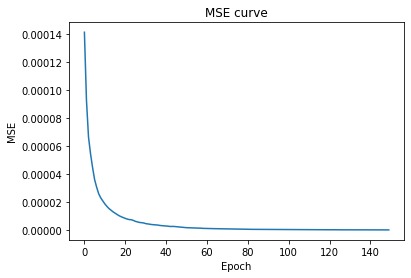

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 69)                2484      
                                                                 
 dense_33 (Dense)            (None, 1)                 70        
                                                                 
Total params: 2,554
Trainable params: 2,554
Non-trainable params: 0
_________________________________________________________________
Hyperparameters: h = 69, BAT = 936
Computing Time:  3.92 sec
Number of batches:  2
Terminal value of MSE:  1.7766922155715292e-06


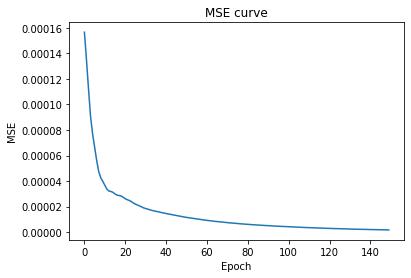

In [ ]:
##### Q4
# Trying combinations of different h values and BATS
import time

h_vals = [23, 3*23]
BATS = [TRN//40, TRN//20, TRN//10, TRN//2]
numBATS = [40, 20, 10, 2]
TOTEP = 150
models = [None] * 8
history = [None] * 8
k = 0

for i in h_vals:
  for j in range(len(BATS)):
    time1 = time.time()
    models[k] = Sequential()
    models[k].add(Dense(i, input_shape=(35,), activation='relu'))
    models[k].add(Dense(1, activation='linear'))
    models[k].summary()

    models[k].compile(loss='mse', optimizer='adam', metrics=['mse'])
    history[k] = models[k].fit(X_train, y_train, epochs= TOTEP, batch_size = BATS[j], verbose = 0, validation_data = (X_test, y_test))
    time2 = time.time()
    print("Hyperparameters: h = %d, BAT = %d" % (i, BATS[j]))
    print("Computing Time: ", round(time2 - time1, 2), "sec")
    print("Number of batches: ", numBATS[j])
    print("Terminal value of MSE: {:0.3e}".format(history[k].history['mse'][-1]))
    
    plt.plot(history[k].history['mse'])
    plt.title('MSE curve')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.show()
    k += 1



In [ ]:
for i in range(len(models)):
  test_results = models[i].evaluate(X_test, y_test, verbose=1)
  test_results

8/8 [==============================] - 0s 2ms/step - loss: 1.2075e-05 - mse: 1.2075e-05


In [ ]:
len(history[1].history['mse'])
#history[1].history['val_mse']

150

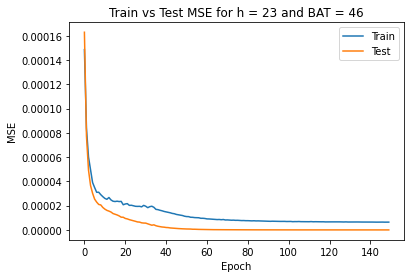

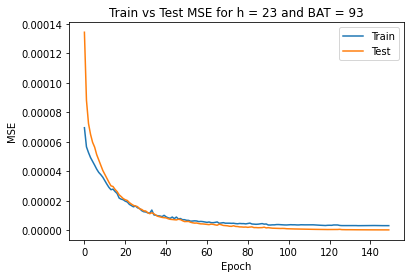

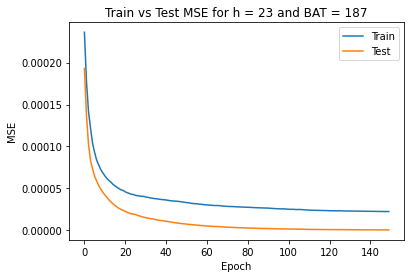

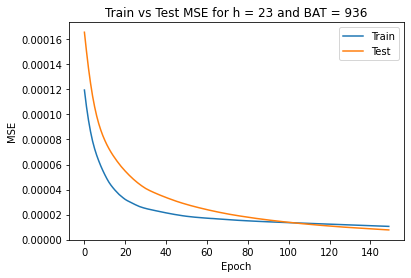

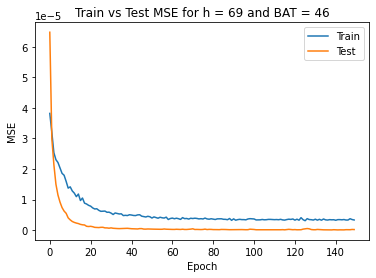

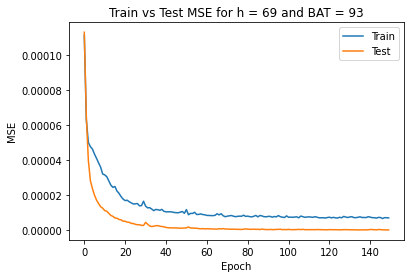

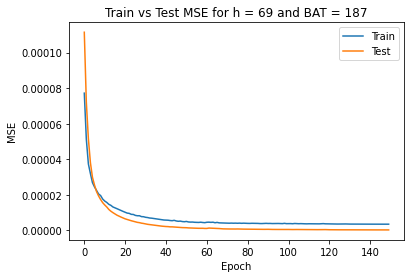

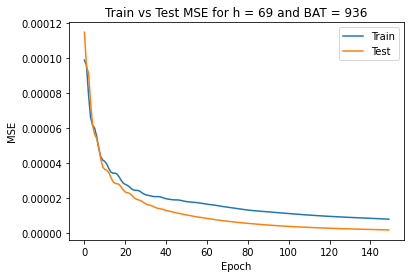

In [ ]:
for i in range(8):
  if i in range(4):
    j = 23
  else:
    j = 23*3
  if i in [0,4]:
    k = TRN//40
  elif i in [1,5]:
    k = TRN//20
  elif i in [2,6]:
    k = TRN//10
  else:
    k = TRN//2
  plt.plot(history[i].history['val_mse'])
  plt.plot(history[i].history['mse'])
  plt.title('Train vs Test MSE for h = %d and BAT = %d' % (j,k))
  plt.ylabel('MSE')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

#Q5

In [ ]:
import warnings
import tensorflow as tf
from tensorflow.keras import optimizers, losses
warnings.filterwarnings('ignore', category=DeprecationWarning)

model = Sequential()
model.add(Dense(23,activation = "relu",input_shape=(35,)))
model.add(Dense(1,activation = 'relu'))


In [ ]:
batch_size = TRN//40
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(buffer_size=1024).batch(batch_size)


optimizer = optimizers.Adam(learning_rate=0.01)
loss_fn = losses.MeanSquaredError()
model.compile(optimizer = 'adam', loss='mse')

batch_loss = []
gradsNorm = []
epoch_loss = []
val_loss = []
best_val_loss = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
#import time
for epoch in range(TOTEP):
  #time_start = time.clock()
  #print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_data):
    with tf.GradientTape() as tape:
      y_batch_pred = model(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train,y_batch_pred)
      grads = tape.gradient(loss_value, model.trainable_weights)
      gradsNorm.append( np.sqrt( sum( [np.sum( np.square(g.numpy())) for g in grads])))
      batch_loss.append(loss_value.numpy())
      optimizer.apply_gradients( zip(grads, model.trainable_weights))
      epoch_loss_value = model.evaluate(X_train,y_train,verbose=0)
      epoch_loss.append(epoch_loss_value)
      val_loss_value = model.evaluate(X_test,y_test,verbose=0)
      val_loss.append(val_loss_value)
      time_elapsed = (time.clock() - time_start)
      #print("epoch_loss: %.4f - val_loss:%.4f - time elapsed:%.4f" % (float(epoch_loss_value), float(val_loss_value), float(time_elapsed)))
      
      if val_loss_value < best_val_loss:
        best_val_loss = val_loss_value
        model.save('bestModel')


INFO:tensorflow:Assets written to: bestModel/assets


In [ ]:
model = Sequential()
model.add(Dense(23,activation = "relu",input_shape=(35,)))
model.add(Dense(1,activation = 'relu'))

In [ ]:
batch_size = TRN//10
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(buffer_size=1024).batch(batch_size)


optimizer = optimizers.Adam(learning_rate=0.01)
loss_fn = losses.MeanSquaredError()
model.compile(optimizer = 'adam', loss='mse')

batch_loss = []
gradsNorm = []
epoch_loss = []
val_loss = []
best_val_loss = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
#import time
for epoch in range(150):
  #time_start = time.clock()
  #print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_data):
    with tf.GradientTape() as tape:
      y_batch_pred = model(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train,y_batch_pred)
      grads = tape.gradient(loss_value, model.trainable_weights)
      gradsNorm.append( np.sqrt( sum( [np.sum( np.square(g.numpy())) for g in grads])))
      batch_loss.append(loss_value.numpy())
      optimizer.apply_gradients( zip(grads, model.trainable_weights))
      epoch_loss_value = model.evaluate(X_train,y_train,verbose=0)
      epoch_loss.append(epoch_loss_value)
      val_loss_value = model.evaluate(X_test,y_test,verbose=0)
      val_loss.append(val_loss_value)
      #time_elapsed = (time.clock() - time_start)
      #print("epoch_loss: %.4f - val_loss:%.4f - time elapsed:%.4f" % (float(epoch_loss_value), float(val_loss_value), float(time_elapsed)))
      
      if val_loss_value < best_val_loss:
        best_val_loss = val_loss_value
        model.save('bestModel')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 108       
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#batch to batch MSE
x = range(1025)
plt.figure(dpi=150)
plt.plot(x,batch_loss,'b')
plt.title('Batch to batch evolution of MSE (h=2)')
plt.xlabel('batch number')
plt.ylabel('MSE')

In [ ]:
#Display the curves trainMSE(m) and testMSE(m)
x = range(epochs)
plt.figure(dpi=150)
plt.plot(x,epoch_loss,'b',label='trainMSE')
plt.plot(x,val_loss,'g',label='testMSE')
plt.title('trainMSE and testMSE after each epoch (h=2)')
plt.xlabel('epoch number')
plt.ylabel('MSE')
plt.legend(loc='upper right')

In [ ]:
#Curve for ||grad MSE(m)||/sqrt(param(h))

# number of parameters = 37, therefore k =37
# we divide the gradient values by sqrt(k)

x = range(1170)
k = 37 #param(h)
sqrt_k = math.sqrt(k)
y = [x/ sqrt_k for x in gradsNorm]
plt.figure(dpi=150)
plt.plot(x,y,'b')
plt.title('Batch to batch evolution of ||gradient MSE|| (h=2)')
plt.xlabel('batch number')
plt.ylabel('MSE')

#Q6

In [ ]:
#For each 8, and each m = 1,2,..,TOTEP:

#Compute trainAcc(m) = sqrt(trainMSE(m))/mean.rZ

#Compute testAcc(m) = sqrt(testMSE(m))/mean.rZ

In [ ]:
#Display trainAcc(m) and testAcc(m)

#Q7

In [ ]:
#Best pair (h,BATS)
#h = 69, BAT = 187, epoch = 45

bestPairModel = Sequential()
bestPairModel.add(Dense(69, input_shape=(35,), activation='relu'))
bestPairModel.add(Dense(1, activation='linear'))
bestPairModel.summary()

bestPairModel.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = bestPairModel.fit(X_train, y_train, epochs= 45, batch_size = 187, verbose = 0, validation_data = (X_test, y_test))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 69)                2484      
                                                                 
 dense_9 (Dense)             (None, 1)                 70        
                                                                 
Total params: 2,554
Trainable params: 2,554
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Get optimal weights
from tensorflow.keras.models import load_model


Wij = bestPairModel.get_weights()

weights1 = abs(bestPairModel.layers[0].get_weights()[0]) #Might need to be absolute values

weights2 = abs(bestPairModel.layers[1].get_weights()[0])



Text(0, 0.5, 'Frequency')

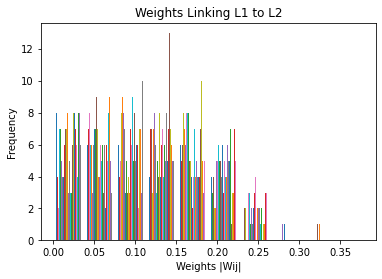

In [ ]:
#FOR h=69, BAT = 187, epoch = 45
#Graph Wij linking neuron j of L1 to neuroni of L2

plt.hist(weights1)
plt.title('Weights Linking L1 to L2')
plt.xlabel('Weights |Wij|')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

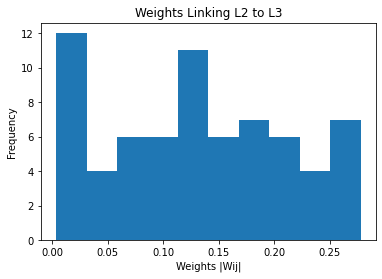

In [ ]:
#histogram of weights linking neuron i of L2 to neuron 1 of L3
plt.hist(weights2)
plt.title('Weights Linking L2 to L3')
plt.xlabel('Weights |Wij|')
plt.ylabel('Frequency')

#Q8

In [ ]:
#Most Influential Hidden Neuron
# mostInf = max(weights2)
# mostInf

array([0.2778632], dtype=float32)

#Q10